# Normal distribution
Standard normal distribution takes a bell curve. It is also called as **gaussian distribution**. Values in nature are believed to take a normal distribution. The equation for normal distribution is 


$$y = \frac{1}{\sigma\sqrt{2\pi}} e^{\frac{(x-\mu)^2}{2\sigma^2}}$$
where
$\mu$ is mean

$\sigma$ is standard deviation

$\pi$ = 3.14159..

$e$ = 2.71828.. (natural log)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
vals = np.random.standard_normal(100000)
len(vals)

100000

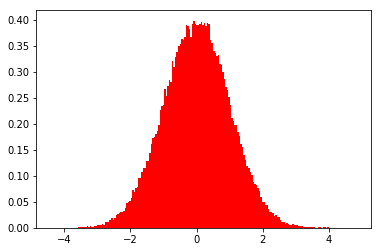

In [19]:
fig, ax = plt.subplots(1,1)
hist_vals = ax.hist(vals, bins=200, color='red', density=True)

The above is the standard normal distribution. Its mean is 0 and SD is 1. About `95%` values fall within $\mu \pm 2 SD$ and `98%` within $\mu \pm 3 SD$

The area under this curve is `1` which gives the probability of values falling within the range of standard normal.

A common use is to find the probability of a value falling at a particular range. For instance, find $p(-2 \le z \le 2)$ which is the probability of a value falling within $\mu \pm 2SD$. This calculated by summing the area under the curve between these bounds.

$$p(-2 \le z \le 2) = 0.9544$$ which is `95.44%` probability. Its `z` score is `0.9544`.

Similarly
$$p(z \ge 5.1) = 0.00000029$$

### Finding z score and p values using SciPy
The standard normal is useful as a **z table** to look up the probability of a **z score** (x axis). You can use Scipy to accomplish this.

### Levels of significance
By rule of thumb, a `z` score greater than `0.005` is considered **significant** as such a value has a very low probability of occuring. Thus, there is less chance of it occurring **randomly** and hence, there is probably a force acting on it (significant force, not random chance).

### Transformation to standard normal
If the distribution of a phenomena follows normal dist, then you can transform it to standard normal, so you can measure the `z` scores. To do so,
$$std normal value = \frac{observed - \mu}{\sigma}$$ You subtract the mean and divide by SD of the distribution.

**Example**
Let X be age of US presidents at inaugration. $X \in N(\mu = 54.8, \sigma=6.2)$. What is the probability of choosing a president at random that is less than `44` years of age.

We need to find $p(x<44)$. First we need to transform to standard normal.

$$p(z< \frac{44-54.8}{6.2})$$
$$p(z<-1.741) = 0.0409 \approx 4\%$$

### Finding z score and p values using SciPy
The standard normal is useful as a **z table** to look up the probability of a **z score** (x axis). You can use Scipy to accomplish this.

In [2]:
import scipy.stats as st

# compute the p value for a z score
st.norm.cdf(-1.741)

0.04084178926110883

Let us try for some common `z scores`:

In [4]:
[st.norm.cdf(-3), st.norm.cdf(-1), st.norm.cdf(0), st.norm.cdf(1), st.norm.cdf(2)]

[0.0013498980316300933,
 0.15865525393145707,
 0.5,
 0.8413447460685429,
 0.9772498680518208]

As you noticed, the `norm.cdf()` function gives the **cumulative probability** (**left tail**) from `-3` to `3` approx. If you need right tailed distribution, you simply subtract this value from `1`.

#### Finding z score from a p value
Sometimes, you have the probability (p value), but want to find the `z score` or how many SD does this value fall from mean. You can do this inverse using `ppf()`.

In [7]:
# Find Z score for a probability of 0.97 (2sd)
st.norm.ppf(0.97)

1.8807936081512509

In [8]:
[st.norm.ppf(0.95), st.norm.ppf(0.97), st.norm.ppf(0.98), st.norm.ppf(0.99)]

[1.6448536269514722,
 1.8807936081512509,
 2.0537489106318225,
 2.3263478740408408]

As is the `ppf()` function gives only positive `z` scores, you need to apply $\pm$ to it.

### Transformation to standard normal and machine learning
Transforming features to standard normal has applications in machine learning. As each feature has a different unit, their range, standard deviation vary. Hence we scale them all to standard normal distribution with **mean=0** and **SD=1**. This way a learner finds those variables that are truly influencial and not simply because it has a larger range.

To accomplish this easily, we use `scikit-learn`'s `StandardScaler` object as shown below:

In [3]:
demo_dist = 55 + np.random.randn(200) * 3.4
std_normal = np.random.randn(200)

In [6]:
[demo_dist.mean(), demo_dist.std(), demo_dist.min(), demo_dist.max()]

[55.11294611274521, 3.29635155084324, 46.56508960658229, 65.69499942017563]

In [7]:
[std_normal.mean(), std_normal.std(), std_normal.min(), std_normal.max()]

[0.08344701747941835,
 0.9782741158088577,
 -1.9692101150067682,
 2.94001634796817]

Now let us use scikit-learn to easily transform this dataset

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
demo_dist = demo_dist.reshape(200,1)
demo_dist_scaled = scaler.fit_transform(demo_dist)

In [23]:
[round(demo_dist_scaled.mean(),3), demo_dist_scaled.std(), demo_dist_scaled.min(), demo_dist_scaled.max()]

[0.0, 1.0, -2.5931264837260137, 3.2102320229538095]

Text(0.5,1,'Histogram of scaled dataset against standard normal')

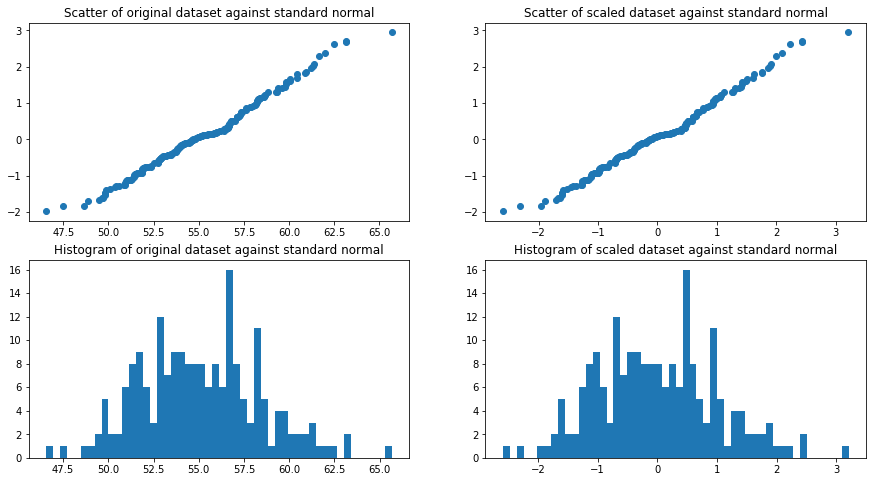

In [49]:
fig, axs = plt.subplots(2,2, figsize=(15,8))
p1 = axs[0][0].scatter(sorted(demo_dist), sorted(std_normal))
axs[0][0].set_title("Scatter of original dataset against standard normal")

p1 = axs[0][1].scatter(sorted(demo_dist_scaled), sorted(std_normal))
axs[0][1].set_title("Scatter of scaled dataset against standard normal")

p2 = axs[1][0].hist(demo_dist, bins=50)
axs[1][0].set_title("Histogram of original dataset against standard normal")

p3 = axs[1][1].hist(demo_dist_scaled, bins=50)
axs[1][1].set_title("Histogram of scaled dataset against standard normal")

As you see above, the shape of distribution is the same, just the values are scaled.

### Assessing normality of a distribution
To assess how normal a distribution of values is, we sort the values, then plot them against sorted values of standard normal distribution. If the values fall on a straight line, then they are normally distributed, else they exhibit skewness and or kurtosis.

In [20]:
demo_dist = 55 + np.random.randn(200) * 3.4
std_normal = np.random.randn(200)

In [21]:
demo_dist = sorted(demo_dist)
std_normal = sorted(std_normal)

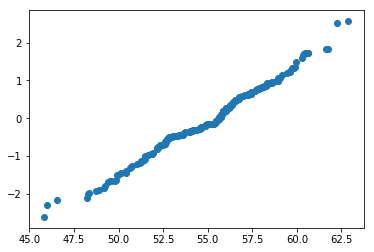

In [22]:
plt.scatter(demo_dist, std_normal)

For the most part, the values fall on a straight line, except in the fringes. Thus, the demo distribution is fairly normal.

### Standard error
As can be seen, we use statistics to estimate population mean $\mu$ from sample mean $\bar x$. Standard error of $\bar x$ represents on average, how far will it be from $\mu$.

As you suspect, the quality of $\bar x$, or its **standard error** will depend on the sample size. In addition, it also depends on population standard deviation. Thus for a tighter population, it is much easy to estimate mean from a small sample as there are fewer outliers.

Nonetheless,
$$SE(\bar x) = \frac{\sigma}{\sqrt{n}}$$ where $\sigma$ is **population SD** and $n$ is sample size.

Empirically, $SE(\bar x)$ is same as the **SD** of a distribution of sample means. If you were to collect a number of samples, find their means to form a distribution, the SD of this distribution represents the **standard error** of that estimate (mean in this case).

### Confidence intervals

From a population, many samples of size > `30` is drawn and their means are computed and plotted, then with $\bar x$ or $\bar y$ -> mean of a sample and $n$ -> size of 1 sample, $\sigma_{\bar x}$ or $\sigma_{\bar y}$ is SD of distribution of samples, you can observe that
 - $\mu_{\bar x} = \mu$ (mean of distribution of sample means equals population mean)
 - $\frac{\sigma}{\sqrt n} = \sigma_{\bar x}$ (SD of population over sqrt of sample size equals SD of sampling distribution)
 - relationship between population mean and mean of a single sample is 
 - $$ \mu = \bar y \pm z(\frac{\sigma}{\sqrt n})$$

The `z` table and normal distribution are used to derive confidence intervals. Popular intervals and their corresponding `z` scores are

|interval|z-value|
|--------|-------|
|99%|$\pm 2.576$|
|98%|$\pm 2.326$|
|95%|$\pm 1.96$|
|90%|$\pm 1.645$|

As you imagine, these are the values of `z` on X axis of the standard normal distribution and the area they cover.

For a normal distribution, confidence intervals for an estimate (such as mean) can be given as
$$CI = \bar x \pm z\frac{s}{\sqrt{n}}$$
where $s$ is sample SD that is substituted in place of population SD, if sample size is larger than **30**.

**Example**
The average TV viewing times of `40` adults sampled in Iowa is `7.75` hours per week. The SD of this sample is `12.5`. **Find the `95%` CI population's average TV viewing times**.

$\bar x = 40$, $s=12.5$, $n=40$, $Z=1.96$ for 95% CI. Thus
$$95\%CI = 7.75 \pm 1.96\frac{12.5}{\sqrt{40}}$$
$$95\%CI = (3.877 | 11.623)$$

Thus the `95`% CI is pretty wide. Intuitively, if SD of sample is smaller, then so is the CI.